# PREDICTING CUSTOMER CHURN FOR A COMMUNICATION COMPANY

## Introduction

Customer churn also known as customer turnover is the fraction of customers that stopped patronizing a company's products or services for a specific period. This project is a classification project which will help a telecom company understand their data, point out what is being done wrong or right and predict the possibilities of customers churning and help the company to make the right decision for the development of the company. We will build a Machine learning algorithm to predict whether customers are likely to churn or not.

This project seeks to ascertain the likelihood of turnover among customers in a Telecommunication company. This project will analyze the possible cause and predict if a customer will churn in future also suggest strategies to retain customers.

### Null Hypothesis:
Customers with multiple services have a high likelihood to leave an organization

### Alternative Hypothesis:
Customers with multiple services have a high likelihood to retain the organization

#### Questions

1. Total number of customers per payment method ?
2. How many Male/Female are subscribed to the organization's services ?
3. How many custmers have stayed in the company for the maximum tenure ? 
4. Which is the most prefered contract ?
5. What is the churn rate for customers with multiple lines ?
6. Total monthly charges that customers with dependents will incur ?

In [85]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Data Splitting
from sklearn.model_selection import train_test_split, GridSearchCV

#Models
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import pickle,os


import shap
# EDA
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
customer_data= pd.read_csv(r"C:\Users\Admin\Desktop\C_A\Telco-Customer-Churn (1)\Telco-Customer-Churn.csv")

In [3]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data.shape

(7043, 21)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Issues identified
The Totalcharges column is in object dtype.

In [6]:
customer_data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

We notice that at position 488 of the totalchages there is an empty space which causes the column to be converted to an object datatype.

In [7]:
#Replacing the empty space with 0
customer_data = customer_data.replace('^\s*$',0, regex = True)

In [8]:
customer_data['TotalCharges']= pd.to_numeric(customer_data['TotalCharges'])

In [9]:
customer_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
customer_data.duplicated().sum()

0

In [11]:
customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


From this we learn that the minimum period that a customer atays in an organization is 0 and the maximum period is 72 months.

## Exploratory Data Analysis

#### Univariate Analysis

In [12]:
# Getting the value count of churn(yes/no)
customer_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

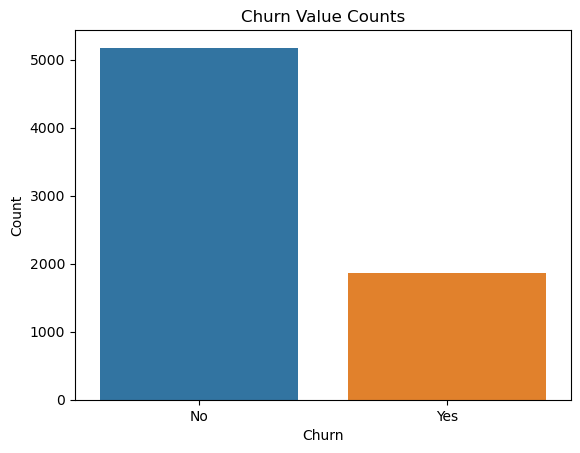

In [13]:
sns.countplot(x='Churn', data=customer_data)
plt.title('Churn Value Counts')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

From the plot we realize that there are more customers staying in the organization than those leaving.

## 2. How many Male/Female are subscribed to the organization's services

In [14]:
# getting the value count of gender
customer_data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

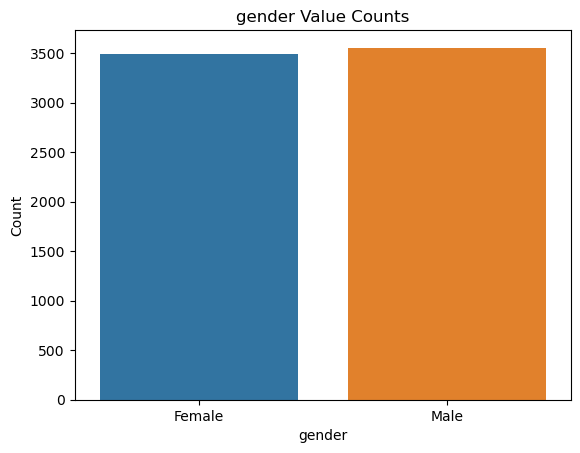

In [15]:
sns.countplot(x='gender', data=customer_data)
plt.title('gender Value Counts')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

## 3. How many customers have stayed in the company for the maximum tenure ?

In [16]:
customers = customer_data.loc[customer_data['tenure'] >=72].groupby('tenure')['customerID'].count().reset_index()

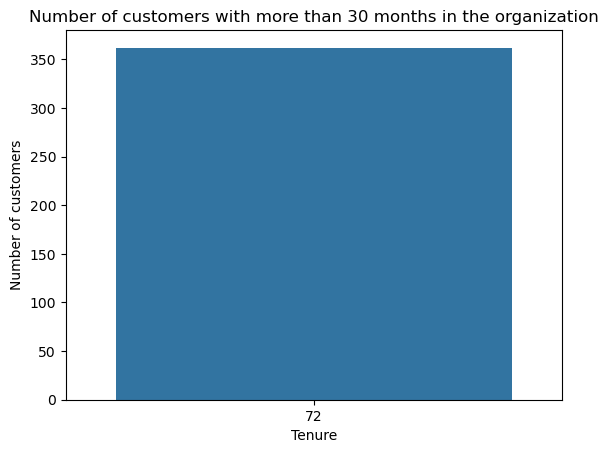

In [17]:
sns.barplot(x='tenure', y='customerID', data=customers)
plt.title('Number of customers with more than 30 months in the organization')
plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.show()

#### Bivariate Analysis

## 1. Total number of customers per payment method ?

In [18]:
customer_paymentmethods=customer_data.groupby(['PaymentMethod'])['customerID'].agg('count').reset_index(name='count')

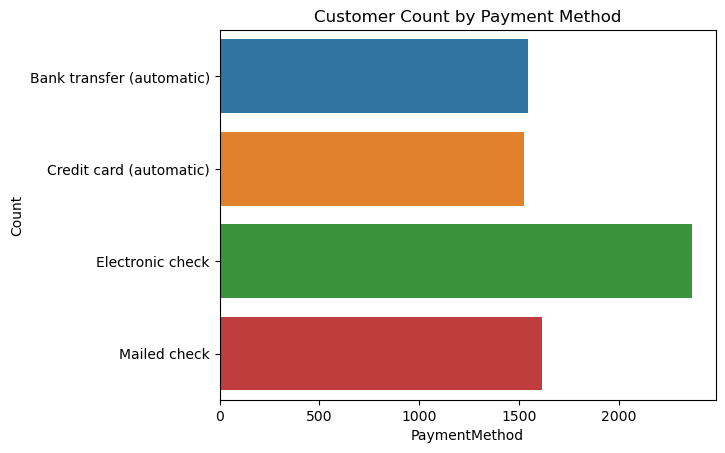

In [19]:
sns.barplot(x='count', y='PaymentMethod', data=customer_paymentmethods)
plt.title('Customer Count by Payment Method')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.show()

## 4. Which is the most prefered contract ?

In [20]:
customer_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

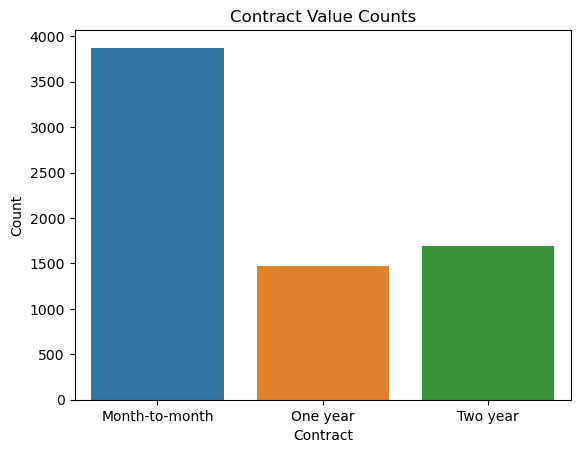

In [21]:
sns.countplot(x='Contract', data=customer_data)
plt.title('Contract Value Counts')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

The plot shows that the month-to-month contract is mostly used.

## 5. What is the churn rate for customers with multiple lines ?

In [22]:
customer_data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [23]:
customer_MultipleLines = customer_data['MultipleLines'].value_counts()['Yes']
customer_MultipleLines

2971

In [24]:
customer_churn = customer_data[(customer_data['MultipleLines'] == 'Yes') & (customer_data['Churn'] == 'Yes')]
                                             .groupby(['MultipleLines', 'Churn'])['customerID'].agg('count')
customer_churn

MultipleLines  Churn
Yes            Yes      850
Name: customerID, dtype: int64

In [25]:
customer_churnrate = (customer_churn.values / customer_MultipleLines)*100
print ("The Percentage Rate is: ", customer_churnrate )

The Percentage Rate is:  [28.60989566]


## 6. Total monthly charges that customers with dependents will incur 

In [26]:
customer_with_dependants=customer_data.groupby(['Dependents'])['TotalCharges'].agg('sum').reset_index()

In [27]:
customer_with_dependants

,Dependents,TotalCharges
0,No,10791969.75
1,Yes,5264198.95


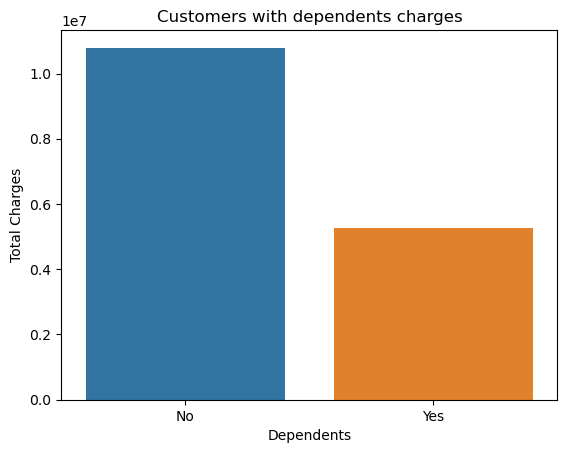

In [28]:
sns.barplot(x='Dependents', y='TotalCharges', data=customer_with_dependants)
plt.title('Customers with dependents charges')
plt.xlabel('Dependents')
plt.ylabel('Total Charges')
plt.show()

### Hypothesis testing

In [29]:
#Answering the hypothesis
customer_ = customer_data.drop('customerID',axis=1)
customer_['TotalServices'] = customer_data[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].sum(axis=1)
customer_['Churn'] = customer_data['Churn'].apply(lambda x: 1 if x=='Yes' else 0) # convert churn column to binary values


In [30]:
churn_rate =customer_.groupby('TotalServices')['Churn'].mean().sort_values(ascending=False).reset_index()
churn_rate.head()

,TotalServices,Churn
0,YesNoFiber opticYesNoYesYesYesNo,1.000000
1,YesNoFiber opticNoYesNoYesNoYes,0.750000
2,YesNoFiber opticNoNoNoNoYesNo,0.739130
3,YesYesFiber opticNoNoNoNoNoYes,0.727273
4,NoNo phone serviceDSLNoNoNoNoNoYes,0.722222


From the analysis of the churn rate and totalservices we reject the null hypothesis because there is no general relationship that Customers with multiple services have a high likelihood to leave an organization. we realise that some customers with no multiple services are have a high customer churn rate. In conclusion we see that the number of services that a customer has does not contribute to churn.

## Data splitting

In [31]:
# spliting the data into feature and targer variables
X = customer_data.iloc[:,:-1]
y = customer_data.iloc[:,-1]

In [32]:
# Encoding the target variable
label_encoder=LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

In [33]:
#converting to a DataFrame
y_encoded_df = pd.DataFrame(y_encoded, columns = ["Churn"])

In [34]:
# combining the features and the encoded target variables
customer_df = pd.concat([X, y_encoded_df], axis = 1 )

In [35]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [36]:
# Split the encoded data into train and test sets
X_train, X_eval, y_train, y_eval = train_test_split(customer_df.iloc[:, :-1], customer_df.iloc[:, -1:],
                                                    test_size=0.2, random_state=42, stratify=customer_df.iloc[:, -1:])

In [37]:
X_train.shape, X_eval.shape, y_train.shape, y_eval.shape

((5634, 20), (1409, 20), (5634, 1), (1409, 1))

## Imputing Missing Values

In [38]:
#puting all categorical features in a list 
categorical_columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                     'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                     'StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [39]:
#puting all numerical features in a list 
numerical_columns = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [40]:
'''creating copy of the categorical features and numerical features
before imputing null value to avoid modifying the orginal dataset'''

X_train_cat = X_train[categorical_columns].copy()
X_train_num = X_train[numerical_columns].copy()

X_eval_cat = X_eval[categorical_columns].copy()
X_eval_num = X_eval[numerical_columns].copy()

In [41]:
# Creating imputer variables
numerical_imputer = SimpleImputer(strategy = "mean")
categorical_imputer = SimpleImputer(strategy = "most_frequent")

In [42]:
# Fitting the Imputer
X_train_cat_imputed = categorical_imputer.fit_transform(X_train_cat)
X_train_num_imputed = numerical_imputer.fit_transform(X_train_num)

X_eval_cat_imputed = categorical_imputer.fit_transform(X_eval_cat)
X_eval_num_imputed = numerical_imputer.fit_transform(X_eval_num)

## Feature Encoding

In [43]:
 encoder=OneHotEncoder(handle_unknown='ignore')

In [44]:
# encoding the xtrain categories and converting to a dataframe
X_train_cat_encoded = encoder.fit(X_train_cat_imputed)
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat_imputed).toarray(),
                                   columns=encoder.get_feature_names(categorical_columns))

In [45]:
# encoding the xeval categories and converting to a dataframe
X_eval_cat_encoded = encoder.fit(X_eval_cat_imputed)
X_eval_cat_encoded = pd.DataFrame(encoder.transform(X_eval_cat_imputed).toarray(),
                                   columns=encoder.get_feature_names(categorical_columns))

## Feature  Scaling

In [46]:
scaler = StandardScaler()

In [47]:
X_train_num_scaled = scaler.fit_transform(X_train_num_imputed)
X_train_num_sc = pd.DataFrame(X_train_num_scaled, columns = numerical_columns)

In [48]:
X_eval_num_scaled = scaler.fit_transform(X_eval_num_imputed)
X_eval_num_sc = pd.DataFrame(X_eval_num_scaled, columns = numerical_columns)

## Combining Numerical and Categorical Imputs

In [49]:
X_train_df = pd.concat([X_train_num_sc,X_train_cat_encoded], axis =1)
X_eval_df = pd.concat([X_eval_num_sc,X_eval_cat_encoded], axis =1)

In [50]:
X_train_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.441773,0.102371,-0.521976,-0.262257,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.441773,-0.711743,0.337478,-0.503635,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.441773,-0.793155,-0.809013,-0.749883,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.441773,-0.263980,0.284384,-0.172722,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.441773,-1.281624,-0.676279,-0.989374,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [51]:
X_eval_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.432465,1.634958,1.671630,2.829586,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2.312325,-0.975463,1.206555,-0.583726,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.432465,0.370535,0.477158,0.455960,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.432465,-0.567585,0.472139,-0.330786,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.432465,1.634958,0.621030,1.678736,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Resampling data to balance the minority to the majority

In [52]:
# applying resampling method to balance the data
Xtrain_resampled, ytrain_resampled = SMOTE().fit_resample(X_train_df, y_train) # using over_sampling

In [53]:
Xtrain_resampled.shape, ytrain_resampled.shape

((8278, 45), (8278, 1))

## Decision Tree Regression Model

In [54]:
#fitting decision tree model
dt_model=DecisionTreeClassifier(random_state=42)

In [55]:
#fitting model on imbalanced data
dt_model.fit(X_train_df,y_train)
# Make predictions on the evaluation data
dt_pred1 = dt_model.predict(X_eval_df)

In [56]:
# report on unbalanced data
dt_report1 = classification_report(y_eval, dt_pred1)
print(dt_report1)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1035
           1       0.48      0.45      0.46       374

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



## Random Forest

In [57]:
rf_model = RandomForestClassifier(random_state=42)

In [58]:
#fitting  rf_model on imbalanced data
rf_model.fit(X_train_df, y_train)
# Make predictions on the eval_imbalanced data
rf_pred1 = rf_model.predict(X_eval_df)

In [59]:
# report on unbalanced data
rf_report1 = classification_report(y_eval, rf_pred1)
print(rf_report1)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.45      0.52       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



## Logistic Regression

In [60]:
# Fit a logistic regression model to the training data
lr_model = LogisticRegression(random_state=42)

In [61]:
#fitting model on the imbalanced data
lr_model.fit(X_train_df,y_train)
# Make predictions on the evaluation imbalanced data
lr_pred1 = lr_model.predict(X_eval_df)

In [62]:
# report on unbalanced data
lr_report1 = classification_report(y_eval, lr_pred1)
print(lr_report1)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



## K Nearest Neighbour

In [63]:
kn_model = KNeighborsClassifier(n_neighbors=5)

In [64]:
# fitting model on unbalanced data
kn_model.fit(X_train_df, y_train)
# Make predictions on the evaluation data
kn_pred1 = kn_model.predict(X_eval_df)

In [65]:
# report on unbalanced data
kn_report1 = classification_report(y_eval, kn_pred1)
print(kn_report1)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1035
           1       0.55      0.55      0.55       374

    accuracy                           0.76      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.76      0.76      0.76      1409



## model comparison

In [66]:
dt_f1= f1_score(y_eval, dt_pred1)
rf_f1= f1_score(y_eval, rf_pred1)
kn_f1= f1_score(y_eval, kn_pred1)
lr_f1= f1_score(y_eval, lr_pred1)

In [67]:
results= {'model':['DecisionTreeClassifier','RandomForestClassifier','KNN','LogisticRegression'],
         'f1_score':[dt_f1,rf_f1,kn_f1,lr_f1]}
results_df= pd.DataFrame(results)

In [68]:
results_df

,model,f1_score
0,DecisionTreeClassifier,0.464924
1,RandomForestClassifier,0.521605
2,KNN,0.553476
3,LogisticRegression,0.600293


From all the models fit and evaluated logistic regression model seems to perform better than the other models,with f1_score of 60%

## Feature importance

In [69]:
# Get feature importances for decision tree model
dt_importances = dt_model.feature_importances_
importances_df = pd.DataFrame({'feature': X_train_df.columns, 'dt_importances': dt_importances})

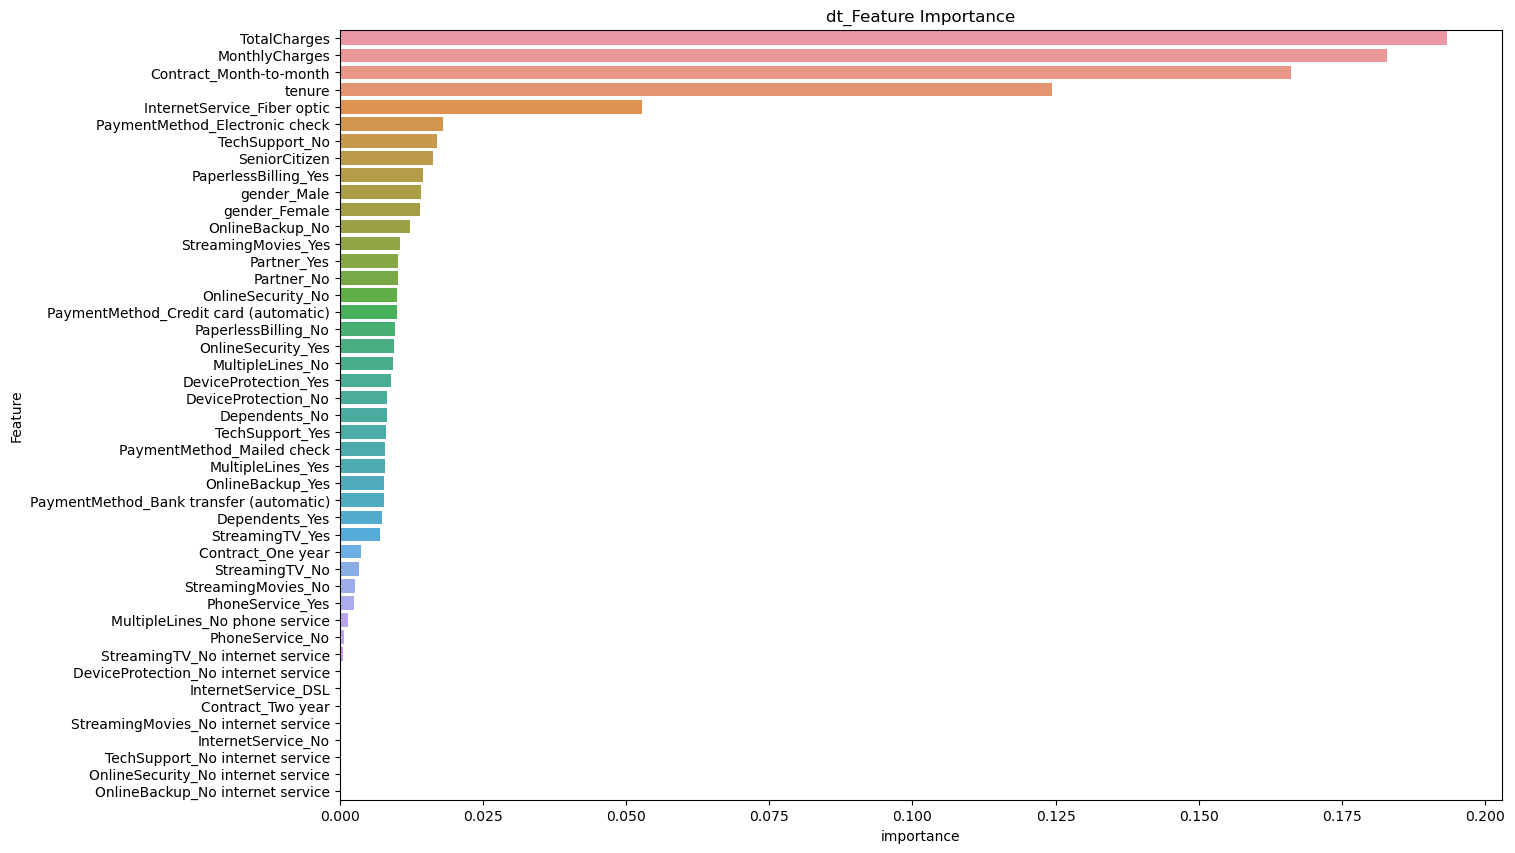

In [70]:
plt.figure(figsize=(15,10))
# sort the dataframe by importance 
importances_df = importances_df.sort_values('dt_importances', ascending=False)

# create a horizontal bar plot using seaborn

sns.barplot(x='dt_importances', y='feature', data=importances_df)
plt.title('dt_Feature Importance')
plt.xlabel('importance')
plt.ylabel('Feature')
plt.show()

In [71]:
# Get feature importances for random forest model
rf_importances = rf_model.feature_importances_
importances_rf = pd.DataFrame({'feature': X_train_df.columns, 'rf_importances': rf_importances})

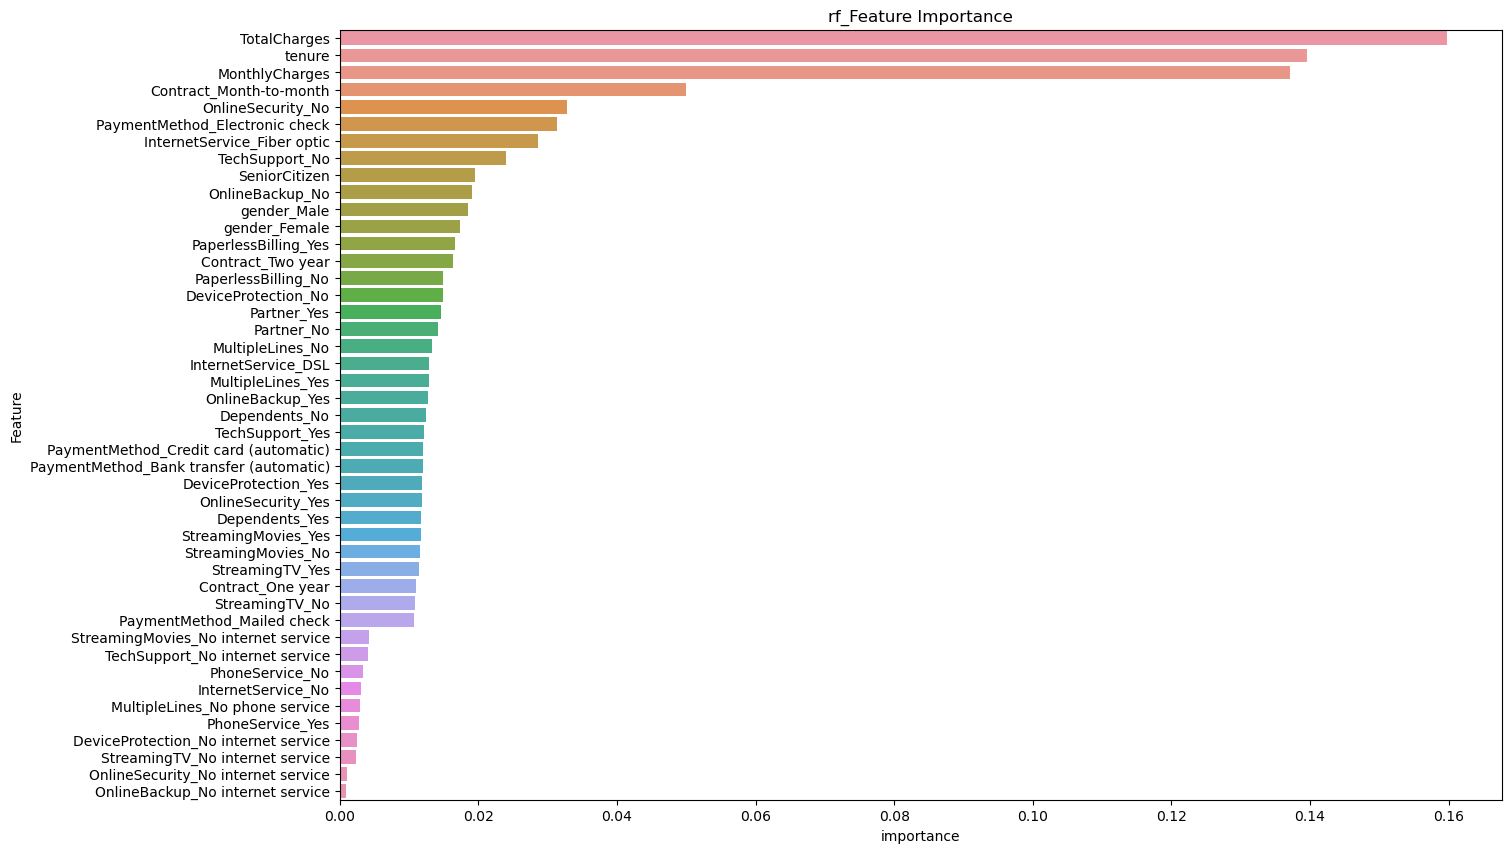

In [72]:
plt.figure(figsize=(15,10))
# sort the dataframe by importance
importances_rf = importances_rf.sort_values('rf_importances', ascending=False)
# create a horizontal bar plot using seaborn
sns.barplot(x='rf_importances', y='feature', data=importances_rf)
plt.title('rf_Feature Importance')
plt.xlabel('importance')
plt.ylabel('Feature')
plt.show()

In [73]:
model = LogisticRegression(penalty='l1', solver='liblinear')

# fit the model on the entire dataset
model.fit(X_train_df,y_train)

# compute the absolute coefficient values
coef_abs = np.abs(model.coef_)

# compute the sum of absolute coefficient values across each feature
feature_importance = np.sum(coef_abs, axis=0)

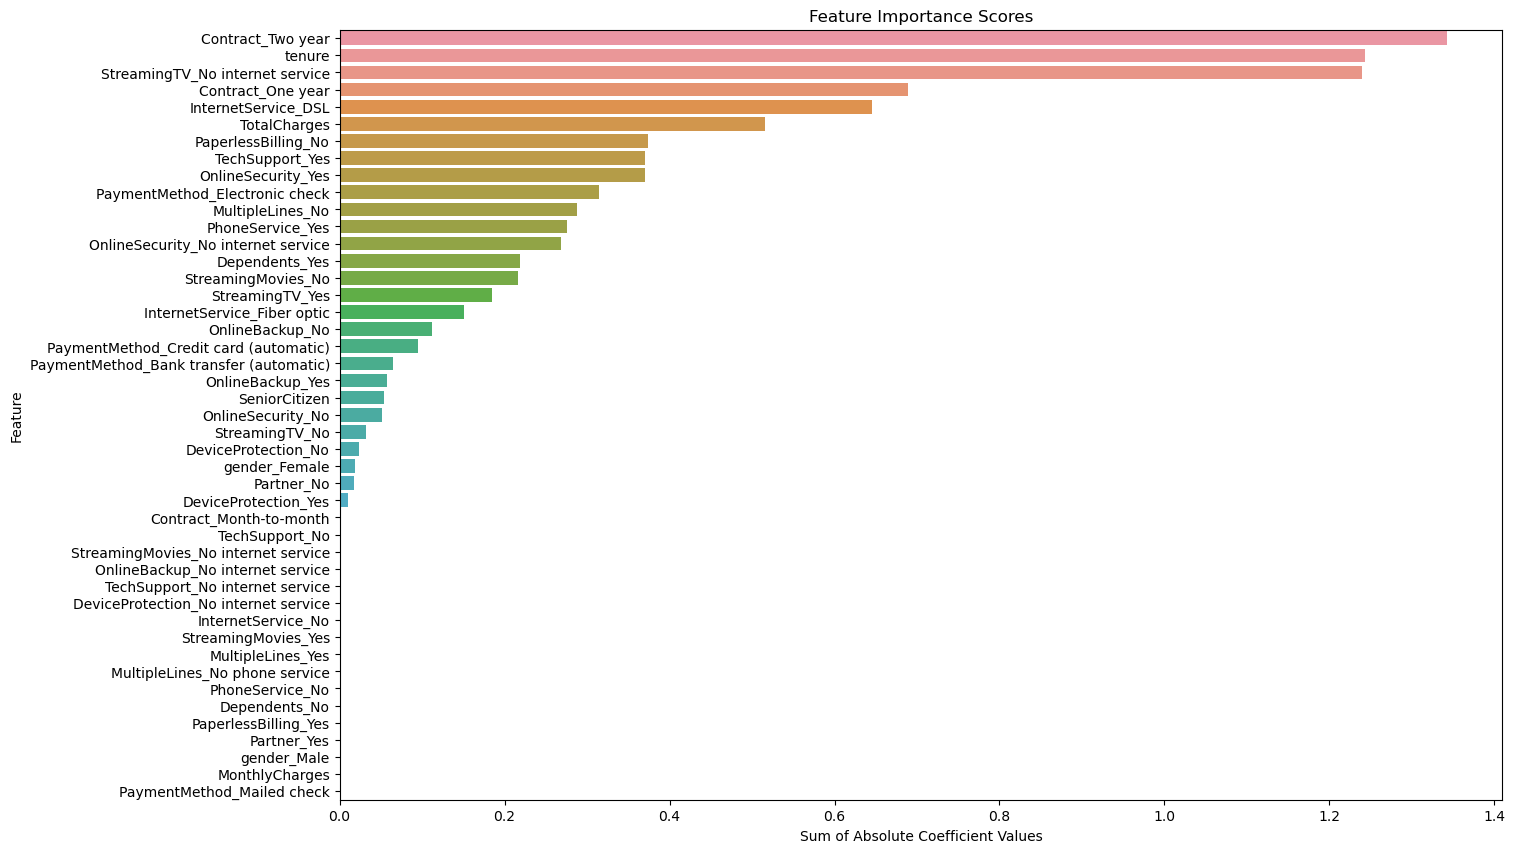

In [74]:
plt.figure(figsize=(15,10))
# create a pandas dataframe with the feature importance scores
importance_df = pd.DataFrame({'feature': X_train_df.columns, 'importance': feature_importance})

# sort the dataframe by importance score
importance_df = importance_df.sort_values('importance', ascending=False)

# create a horizontal bar plot using seaborn
#sns.set_style('whitegrid')
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importance Scores')
plt.xlabel('Sum of Absolute Coefficient Values')
plt.ylabel('Feature')
plt.show()

## Model Interpretation

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensiona.

In [75]:
# Draw sample of observations
sample = X_eval_df

# Pick 700th observation from sample to explain
idx = 700

# Print 700th observation
print(
    f'Observed features of observation number {idx}:\n',
    sample.iloc[[idx], :],
    sep=''
)

# Print predicted value made on 700th observation
print(
    f'\n\nPredicted severity of the disease for patient number {idx}:\n',
    model.predict(sample.iloc[[idx], :]),
    sep=''
)

Observed features of observation number 700:
     SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
700       2.312325 -0.118919        0.508944      0.096259            0.0   

     gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
700          1.0         0.0          1.0            1.0             0.0  ...   

     StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
700                  0.0                      1.0                0.0   

     Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
700                0.0                  0.0                   1.0   

     PaymentMethod_Bank transfer (automatic)  \
700                                      0.0   

     PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
700                                    0.0                             1.0   

     PaymentMethod_Mailed check  
700                         0.0  

[1 rows x 45 columns]


Predic

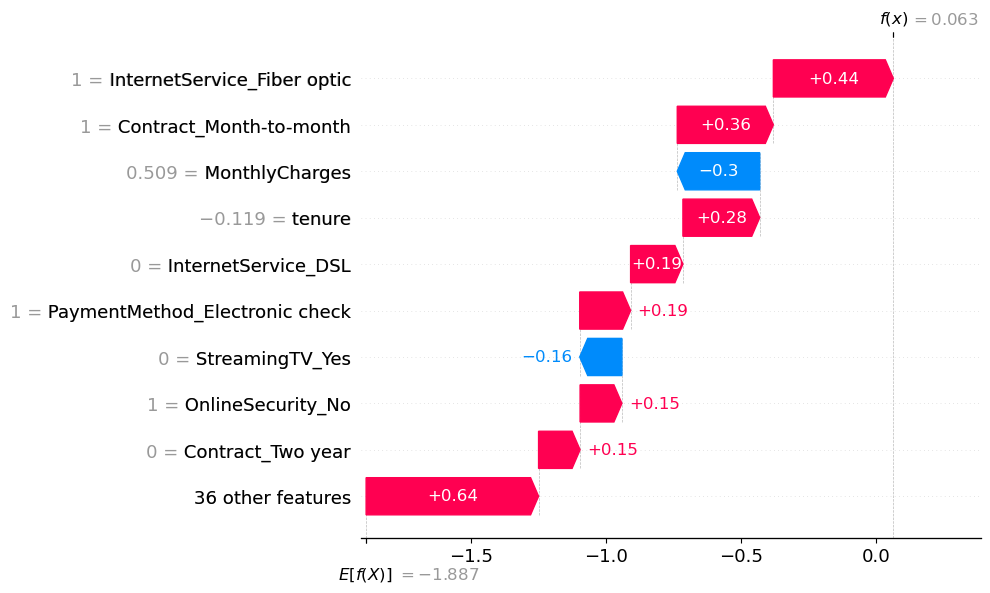

In [76]:
# Instantiate explainer
lr_explainer = shap.Explainer(lr_model,X_train_df)
   
# Calculate SHAP values using sample
lr_shap_values = lr_explainer(sample)

# Waterfall plot
shap.plots.waterfall(shap_values=lr_shap_values[idx])


From the plot we realise that the internet fibre optic(1) has positively influenced the model with shapley value of(+o.44),the monthly charges is among the top 5 although it did influence the model negatively with shapley value of (-0.3)

## Hyperparameter tuning

In [77]:
# Define the parameter grid for the decision tree classifier
dt_param = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5,10 ,15]
}


# perform a grid search with 5-fold cross-validation using only the selected features
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param,scoring='f1',cv=5)
dt_grid_search.fit(X_train_df,y_train)

# print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", dt_grid_search.best_params_)
print('Best estimators: ',dt_grid_search.best_estimator_)
print("Best f1_score: ", dt_grid_search.best_score_)

Best hyperparameters:  {'max_depth': 5, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimators:  DecisionTreeClassifier(max_depth=5, max_features=15, random_state=42)
Best f1_score:  0.5696270216298357


In [78]:
# define the hyperparameter grid to search over the logistics regression model
lr_param = {
    'C': [200,300,400,500],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# perform a grid search with 5-fold cross-validation using only the selected features
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param,scoring='f1',cv=5)
lr_grid_search.fit(X_train_df, y_train)

# print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", lr_grid_search.best_params_)
print('Best estimators: ',lr_grid_search.best_estimator_)
print("Best f1_score average: ", lr_grid_search.best_score_)

Best hyperparameters:  {'C': 200, 'solver': 'sag'}
Best estimators:  LogisticRegression(C=200, random_state=42, solver='sag')
Best f1_score average:  0.599371387712228


In [79]:
# define the parameter grid for knn model
kn_param = {'n_neighbors': [20,25,30,35,40],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}
# perform grid search with cross-validation
kn_grid_search = GridSearchCV(kn_model, param_grid=kn_param,scoring='f1', cv=5)
kn_grid_search.fit(X_train_df, y_train)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ",kn_grid_search.best_params_)
print('Best estimators: ',kn_grid_search.best_estimator_)
print("Best score: ", kn_grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 35, 'p': 1, 'weights': 'uniform'}
Best estimators:  KNeighborsClassifier(n_neighbors=35, p=1)
Best score:  0.6101095571752914


from performing hyperparameter tuning on the different model knn model has shown a better improvement with an f1_score of 61% better than the score of logistic regression model

## Export key components
Here is the section to export the important ML objects that will be use to develop an app: Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc.

In [80]:
# Get the best KNN model
best_knn = kn_grid_search.best_estimator_

In [81]:
components_dtc = {
    "num_imputer":numerical_imputer,
    "cat_imputer": categorical_imputer,
    "encoder": encoder,
    "scaler": scaler,
    "models": best_knn 
}

In [92]:
# Export the KNN model
with open('kn_model.pkl', 'wb') as f:
    pickle.dump(components_dtc, f)

In [93]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
